<IPython.core.display.Javascript object>


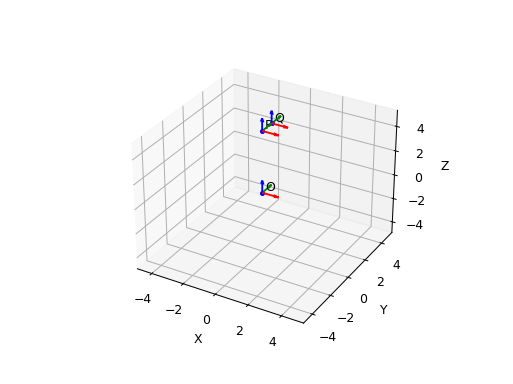

In [1]:
from sympy.physics.mechanics import ReferenceFrame,Point,dynamicsymbols
from sympy.physics.mechanics import Point
from sympy import latex,pprint,symbols,init_printing
from sympy.algebras.quaternion import Quaternion
import numpy as np
import sys 
sys.path.append("../tools")
from vis import Visualizer
%matplotlib notebook

init_printing() # Para visualizar simbolos
# Definicion del modelo para el ejemplo de atraccion de parque de diversiones
a=ReferenceFrame('A')
#Defina el punto O
o=Point('O')
# Parametros del modelo
l,r=dynamicsymbols('L,R')
# Variables de movimiento
q1,q2=dynamicsymbols('q1,q2')
# Marco de referencia intermedio E
e=a.orientnew('E','Axis',(q1,a.y))
# Marco de referencia intermedio B
b=e.orientnew('B','Axis',(q2,-e.z))
p=o.locatenew('P',l*b.z)
q=p.locatenew('Q',r*b.y)
# Visualizacion (trabajo en progreso)

# Construya un objecto de visualizacion con el marco de referencia inercial y punto de origen
vis=Visualizer(a,o)
# Agrege marcos y puntos para ser visualizados (marco,punto)
vis.add(a,o)
vis.add(e,p)
vis.add(b,q)
# Modifique las variables de movimiento y verifique el cambio en la posicion y
# orientacion de los marcos
vis.plot({l:5,r:1,q1:0.3,q2:0.9})
#Esto permite crear animaciones facilmente
#Ejecute esta celda y de click en la figura 1 para observar el movimiento.
import matplotlib
tt=np.linspace(0,10,500)
qq1=np.sin(2*np.pi*0.1*tt)
qq2=np.linspace(0,np.pi*2*10,len(tt))

def animfunc(i,qq1,qq2):
    vis.plot({l:5,r:1,q1:qq1[i],q2:qq2[i]})
    print('hola')
    
matplotlib.animation.FuncAnimation(vis.fig,animfunc,fargs=(qq1,qq2),interval=20)   